### Bagging

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
df= pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [6]:
df['income']= np.where(df['income']=='>50K',1,0)

In [7]:
df.income.unique()

array([0, 1])

In [8]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
df.duplicated().sum()

24

In [12]:
df.shape

(32561, 15)

In [13]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.duplicated().sum()

0

In [14]:
target=df[['income']]
feature= df.drop(columns='income')

In [44]:
target.shape

(32537, 1)

In [15]:
num_col= [i for i in feature.columns if feature[i].dtype!='O']
print(num_col)

['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


In [16]:
cat_col= [i for i in feature.columns if feature[i].dtype=='O']
print(cat_col)

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


In [17]:
df1=feature[num_col]
df1

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32532,22,310152,10,0,0,40
32533,27,257302,12,0,0,38
32534,40,154374,9,0,0,40
32535,58,151910,9,0,0,40


In [18]:
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
for col in df1.select_dtypes(['int','float']).columns:
    outlier_capping(df1,col)

In [19]:
df1

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,78.0,77053.0,9.0,0.0,0.0,40.0
1,78.0,132870.0,9.0,0.0,0.0,32.5
2,66.0,186061.0,10.0,0.0,0.0,40.0
3,54.0,140359.0,4.5,0.0,0.0,40.0
4,41.0,264663.0,10.0,0.0,0.0,40.0
...,...,...,...,...,...,...
32532,22.0,310152.0,10.0,0.0,0.0,40.0
32533,27.0,257302.0,12.0,0.0,0.0,38.0
32534,40.0,154374.0,9.0,0.0,0.0,40.0
32535,58.0,151910.0,9.0,0.0,0.0,40.0


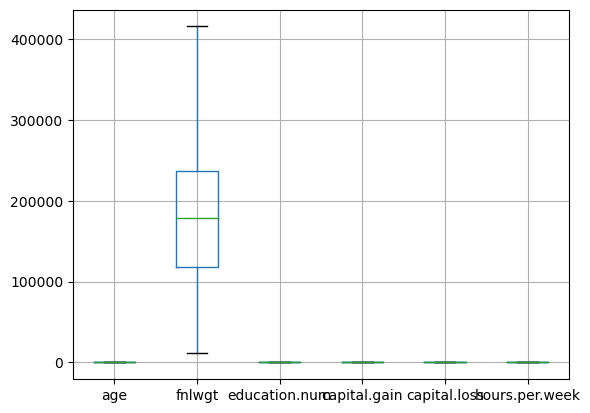

In [20]:
import matplotlib.pyplot as plt
df1.boxplot()
plt.show()

In [21]:
from sklearn.feature_selection import f_classif,chi2

In [22]:
f_cla=f_classif(df1,target)
f_cla

(array([1.91601995e+03, 2.30680815e+00, 4.31976104e+03,            nan,
                   nan, 2.57998709e+03]),
 array([0.        , 0.12881803, 0.        ,        nan,        nan,
        0.        ]))

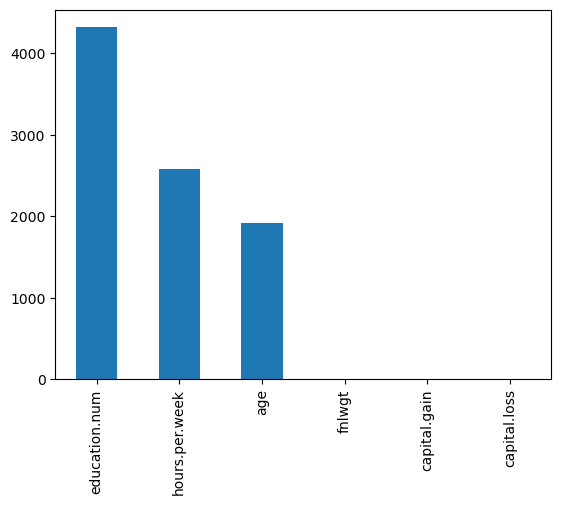

In [23]:
pd.Series(f_cla[0],index=df1.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [24]:
df1=df1[['education.num','hours.per.week','age']]
df1

,education.num,hours.per.week,age
0,9.0,40.0,78.0
1,9.0,32.5,78.0
2,10.0,40.0,66.0
3,4.5,40.0,54.0
4,10.0,40.0,41.0
...,...,...,...
32532,10.0,40.0,22.0
32533,12.0,38.0,27.0
32534,9.0,40.0,40.0
32535,9.0,40.0,58.0


In [25]:
from sklearn.preprocessing import StandardScaler
std_sca=StandardScaler()
df1= pd.DataFrame(std_sca.fit_transform(df1),columns=df1.columns)

In [26]:
df1

,education.num,hours.per.week,age
0,-0.457496,-0.194472,2.909716
1,-0.457496,-1.406640,2.909716
2,-0.050893,-0.194472,2.024410
3,-2.287212,-0.194472,1.139104
4,-0.050893,-0.194472,0.180023
...,...,...,...
32532,-0.050893,-0.194472,-1.221711
32533,0.762315,-0.517717,-0.852834
32534,-0.457496,-0.194472,0.106247
32535,-0.457496,-0.194472,1.434206


In [27]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()
df2=feature[cat_col]
df2

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States
...,...,...,...,...,...,...,...,...
32532,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States
32533,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32534,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32535,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States


In [28]:
df2.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [29]:
df2[['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race','native.country']]=ord_enc.fit_transform(
df2[['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race','native.country']])

In [30]:
df2= pd.get_dummies(df2,dtype='int')

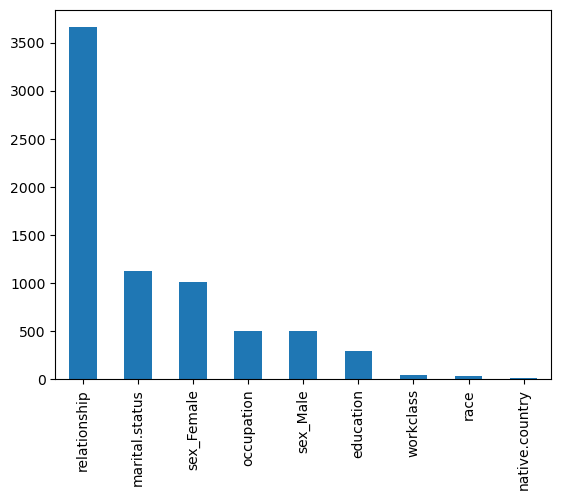

In [31]:
chi=chi2(df2,target)
pd.Series(chi[0],index=df2.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [32]:
df2.drop(columns=['workclass','race','native.country'],inplace=True)

In [33]:
df1

,education.num,hours.per.week,age
0,-0.457496,-0.194472,2.909716
1,-0.457496,-1.406640,2.909716
2,-0.050893,-0.194472,2.024410
3,-2.287212,-0.194472,1.139104
4,-0.050893,-0.194472,0.180023
...,...,...,...
32532,-0.050893,-0.194472,-1.221711
32533,0.762315,-0.517717,-0.852834
32534,-0.457496,-0.194472,0.106247
32535,-0.457496,-0.194472,1.434206


In [34]:
df2

,education,marital.status,occupation,relationship,sex_Female,sex_Male
0,11.0,6.0,0.0,1.0,1,0
1,11.0,6.0,4.0,1.0,1,0
2,15.0,6.0,0.0,4.0,1,0
3,5.0,0.0,7.0,4.0,1,0
4,15.0,5.0,10.0,3.0,1,0
...,...,...,...,...,...,...
32532,15.0,4.0,11.0,1.0,0,1
32533,7.0,2.0,13.0,5.0,1,0
32534,11.0,2.0,7.0,0.0,0,1
32535,11.0,6.0,1.0,4.0,1,0


In [35]:
features_new=pd.concat([df1,df2],axis=1)

In [36]:
print(features_new.shape)
print(target.shape)

(32537, 9)
(32537, 1)


In [37]:
x_train,x_test,y_train,y_test=train_test_split(features_new,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24402, 9)
(8135, 9)
(24402, 1)
(8135, 1)


In [38]:
bag_class= BaggingClassifier(estimator=LogisticRegression(),n_estimators=100,bootstrap=True,max_features=1)

In [39]:
bag_class.fit(x_train,y_train)

BaggingClassifier(estimator=LogisticRegression(), max_features=1,
                  n_estimators=100)

In [40]:
y_pred= bag_class.predict(x_test)
accuracy_score(y_test,y_pred)

0.7569760295021511

### Random_Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rand_for=RandomForestClassifier(n_estimators=100,max_features='sqrt',max_depth=3,bootstrap=True,criterion='gini')

In [42]:
rand_for.fit(x_train,y_train)

RandomForestClassifier(max_depth=3)

In [43]:
y_pred= rand_for.predict(x_test)
accuracy_score(y_test,y_pred)

0.8124154886293792

In [47]:
import math
log_o=math.log(4/2)

In [48]:
math.exp(log_o)/(1+math.exp(log_o))

0.6666666666666666

## Boosting

In [50]:
features_new.shape

(32537, 9)

In [51]:
x_train.shape

(24402, 9)

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
grad_boost=GradientBoostingClassifier(n_estimators=100,learning_rate=0.5,max_features=0.9,subsample=1,
                                      random_state=50)

In [55]:
grad_boost.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, max_features=0.9, random_state=50,
                           subsample=1)

In [56]:
y_pred= grad_boost.predict(x_test)

In [58]:
accuracy_score(y_test,y_pred)

0.834542102028273

### XGBOOST

In [60]:
# !pip install xgboost

In [61]:
import xgboost as xgb

In [62]:
xgb= xgb.XGBClassifier(n_estimators=100, max_depth=2,learning_rate=0.5,reg_alpha=2,reg_lambda=10,
                       max_features=0.9,subsample=1,random_state=50,min_child_weight=2)

In [64]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_features=0.9,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [65]:
y_pred= xgb.predict(x_test)

In [66]:
accuracy_score(y_test,y_pred)

0.8368776889981561

### LightGBM

In [67]:
# !pip install lightgbm

In [68]:
import lightgbm as lgb

In [69]:
lgb=lgb.LGBMClassifier(n_estimators=100, max_depth=2,learning_rate=0.5,reg_alpha=2,reg_lambda=10,
                       max_features=0.9,subsample=1,random_state=50,min_child_weight=2,max_bins=10,
                       boosting_type='goss',top_rate=0.3,other_rate=0.2)

In [70]:
lgb.fit(x_train,y_train)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 5862, number of negative: 18540
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65
[LightGBM] [Info] Number of data points in the train set: 24402, number of used features: 9
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [

LGBMClassifier(boosting_type='goss', learning_rate=0.5, max_bins=10,
               max_depth=2, max_features=0.9, min_child_weight=2,
               other_rate=0.2, random_state=50, reg_alpha=2, reg_lambda=10,
               subsample=1, top_rate=0.3)

In [71]:
y_pred= lgb.predict(x_test)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


In [72]:
accuracy_score(y_test,y_pred)

0.8347879532882606